In [1]:
!pip install prophet awswrangler

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import awswrangler as wr
path = f"s3://source-voltar/source/fed.csv"
df=wr.s3.read_csv(path)
df.head()

,date,value
0,2022-07-01,0.20
1,2022-06-01,0.24
2,2022-05-01,0.32
3,2022-04-01,0.18
4,2022-03-01,0.20


In [4]:
df.describe()

,value
count,120.000000
mean,2.140833
std,12.799137
min,0.100000
25%,0.240000
50%,0.350000
75%,0.580000
max,100.000000


In [24]:
# Select only the important features i.e. the date and price
data = df[["date","value"]] # select Date and Price
# Rename the features: These names are NEEDED for the model fitting
data = df.rename(columns = {"date":"ds","value":"y"}) #renaming the columns of the dataset
data.head(5)

,ds,y
0,2022-07-01,0.20
1,2022-06-01,0.24
2,2022-05-01,0.32
3,2022-04-01,0.18
4,2022-03-01,0.20


In [56]:
t = data[data.y < max(data.y)]

In [76]:
t.tail()

,ds,y
115,2012-12-01,0.22
116,2012-11-01,0.12
117,2012-10-01,0.18
118,2012-09-01,0.20
119,2012-08-01,0.46


In [57]:
from prophet import Prophet
#m = Prophet(daily_seasonality = True) # the Prophet class (model)
m = Prophet() # the Prophet class (model)
#m.fit(data) # fit the model using all data
m.fit(t)

00:27:51 - cmdstanpy - INFO - Chain [1] start processing
00:27:51 - cmdstanpy - INFO - Chain [1] done processing


In [113]:
full_test = prediction[['ds','trend','yhat','yhat_upper','yhat_lower']]
full_test.tail()

,ds,trend,yhat,yhat_upper,yhat_lower
125,2023-02-28,0.372674,0.465894,0.941099,0.004717
126,2023-03-31,0.371038,0.453121,0.904159,-0.015770
127,2023-04-30,0.369455,0.369361,0.890085,-0.061440
128,2023-05-31,0.367819,0.274372,0.753666,-0.197359
129,2023-06-30,0.366236,0.286714,0.719813,-0.161182


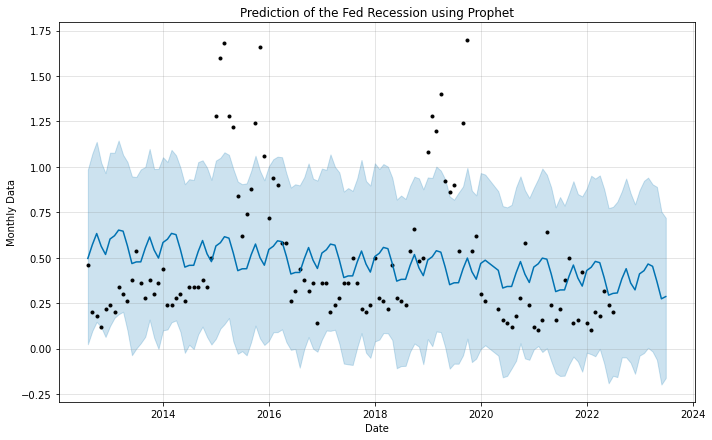

In [112]:
future = m.make_future_dataframe(periods=12,freq="M") #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction,ylabel='trend')
plt.title("Prediction of the Fed Recession using Prophet")
plt.xlabel("Date")
plt.ylabel("Monthly Data")
plt.savefig('plots/Prediction-Fed-Recession-Prophet-Plot.jpg',bbox_inches='tight')

plt.yscale("linear")
plt.show()


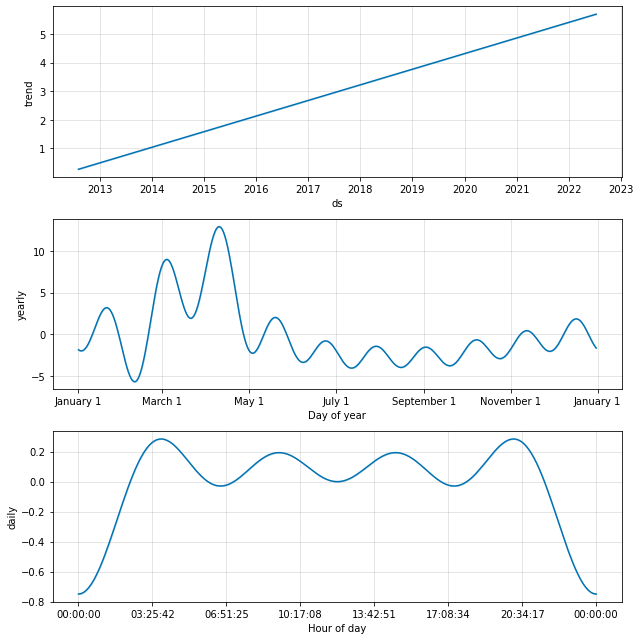

In [8]:
m.plot_components(prediction)
plt.show()
